In [4]:
# System Libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import importlib
import sys

sys.path.append("../")
from modules import common, chapter_03

# Reload Libraries
importlib.reload(common)
importlib.reload(chapter_03)

# Class Instances
constant = chapter_03.Constant()
chapter_03 = chapter_03.chapter_03()

# Check GPU
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


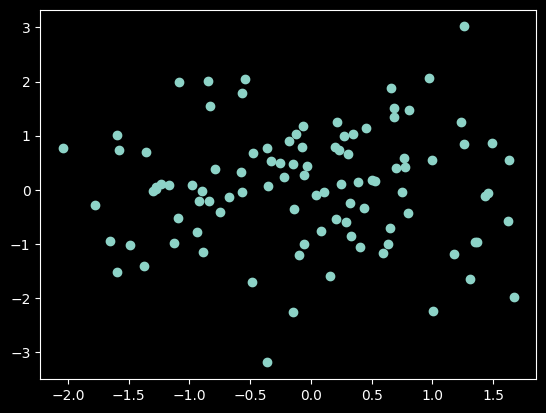

In [3]:
v1 = tf.constant(value=2.0)
v2 = tf.Variable(initial_value=2.0)
v3 = tf.Variable(initial_value=tf.zeros(shape=(2, 2)))
v4 = tf.Variable(initial_value=tf.random.uniform(shape=(100, 100)))
v5 = tf.Variable(initial_value=tf.random.normal(shape=(100, 100)))
plt.scatter(x=v5[:, 0], y=v5[:, 1])

In [5]:
time = tf.Variable(initial_value=2.0)
with tf.GradientTape() as tape1:
    with tf.GradientTape() as tape2:
        position = (1 / 2) * (33.2) * tf.square(time)
    velocity = tape2.gradient(position, time)
acceleration = tape1.gradient(velocity, time)
print("Acceleration: {}".format(acceleration.numpy()))

Acceleration: 33.20000076293945


In [9]:
num_sample = 100
x_pos = np.random.multivariate_normal(mean=[0, 3], cov=[[1.0, 0.5], [0.5, 1.0]], size=num_sample)
x_neg = np.random.multivariate_normal(mean=[3, 0], cov=[[1.0, 0.5], [0.5, 1.0]], size=num_sample)
y_pos = np.ones(shape=(num_sample, 1))
y_neg = np.zeros(shape=(num_sample, 1))
x_train = np.vstack((x_pos, x_neg)).astype(np.float32)
y_train = np.vstack((y_pos, y_neg)).astype(np.float32)
x_train, y_train = common.shuffle_data(x_train, y_train)
num_sample = len(x_train)

**Linear classifier using TensorFlow**

In [29]:
class LinearClassifierTF:
    def __init__(self):
        self.w = tf.Variable(initial_value=(tf.random.uniform(shape=(2, 1))))
        self.b = tf.Variable(initial_value=(tf.zeros(shape=(1))))
        self.n = 0.001

    def train_step(self, x, y):
        with tf.GradientTape() as tape:
            y_pred = tf.matmul(x, self.w) + self.b
            loss = tf.reduce_mean(tf.square(y - y_pred))
        gw, gb = tape.gradient(loss, [self.w, self.b])
        self.w.assign_sub(self.n * gw)
        self.b.assign_sub(self.n * gb)
        return loss

    def fit(self, x, y, epochs=3):
        losses = []
        for _ in range(epochs):
            losses.append(self.train_step(x, y))
        return losses

<tf.Tensor: shape=(), dtype=float32, numpy=2.270115>

**Linear classifier using Keras Optimizer and Loss**

In [43]:
class LinearClassifierKeras:
    def __init__(self):
        self.w = tf.Variable(initial_value=(tf.random.uniform(shape=(2, 1))))
        self.b = tf.Variable(initial_value=(tf.zeros(shape=(1))))
        self.n = 0.001
        self.loss_fn = tf.keras.losses.MeanSquaredError()
        self.optimizer_fn = tf.keras.optimizers.RMSprop(learning_rate=self.n)

    def train_step(self, x, y):
        with tf.GradientTape() as tape:
            y_pred = tf.matmul(x, self.w) + self.b
            loss = self.loss_fn(y, y_pred)
        gradient = tape.gradient(loss, [self.w, self.b])
        self.optimizer_fn.apply_gradients(zip(gradient, [self.w, self.b]))
        return loss

    def fit(self, x, y, epochs=3):
        losses = []
        for _ in range(epochs):
            losses.append(self.train_step(x, y))
        return losses


l = LinearClassifierKeras()
l.fit(x_train, y_train, 3)

[<tf.Tensor: shape=(), dtype=float32, numpy=2.585778>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.5437527>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.5136392>]

**Linear classifier using Keras Model**

In [41]:
model = tf.keras.Sequential(tf.keras.layers.Dense(units=1, activation=None))
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001))
model.fit(x=x_train, y=y_train, epochs=3, verbose=False)